# March Madness Monte Carlo

In [12]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import math
import random
from tqdm import tqdm
import time

import matplotlib.pylab as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})



from common.Team import Team
from common.Tournament import Tournament

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
csv_file = 'teams_64_kenpom_adjEM.csv'

teams = pd.read_csv(csv_file)

tmn = Tournament(teams_csv = csv_file)

print(tmn.__round_to_str__("R01"))

===== ROUND 1 [Round of 32] =====
G01: Gonzaga (37.94)	vs	Iowa (30.24)		WINNER: None
G02: Loyola Chicago (25.08)	vs	Villanova (23.96)		WINNER: None
G03: Connecticut (23.25)	vs	Tennessee (22.44)		WINNER: None
G04: Texas (21.87)	vs	LSU (20.78)		WINNER: None
G05: Rutgers (19.48)	vs	Florida (18.91)		WINNER: None
G06: Syracuse (17.56)	vs	Arizona (17.21)		WINNER: None
G07: Kentucky (16.55)	vs	Drake (15.98)		WINNER: None
G08: Minnesota (15.28)	vs	Xavier (14.68)		WINNER: None
G09: Michigan (32.12)	vs	Houston (29.13)		WINNER: None
G10: Virginia (23.99)	vs	Purdue (23.6)		WINNER: None
G11: Arkansas (22.8)	vs	Kansas (22.33)		WINNER: None
G12: West Virginia (21.62)	vs	Maryland (20.05)		WINNER: None
G13: Penn St. (19.46)	vs	Memphis (17.99)		WINNER: None
G14: Clemson (17.51)	vs	Indiana (17.16)		WINNER: None
G15: Virginia Tech (16.54)	vs	Louisville (15.49)		WINNER: None
G16: Davidson (15.22)	vs	Toledo (14.52)		WINNER: None
G17: Illinois (32.0)	vs	Ohio St. (26.71)		WINNER: None
G18: Wisconsin (23.99)	v

In [67]:
# Simulation

winner_list = []

num_sims = 1000 * 100
print(f"Running Monte Carlo Simulations: {num_sim}")
time.sleep(0.3)

for i in tqdm(range(num_sims)):
    tmn.reset()
    tmn.play_all_games()
    winner = tmn.get_final_winner()
    winner_list.append(winner.name())
    
# Count wins
winners = pd.DataFrame(pd.Series(winner_list).value_counts()).reset_index()
winners.columns = ['Name', 'Wins']
winners['Win%'] = round(winners['Wins'] / num_sims * 100, 3)


time.sleep(0.3)

# Merge with teams
m = teams.merge(winners, on = 'Name')
print(m.sort_values('Wins', ascending=False).head())

Running Monte Carlo Simulations: 1000


100%|█████████████████████████████████████████████████████████| 100000/100000 [02:36<00:00, 640.97it/s]


   Ranking  Seed      Name  Weight  Wins   Win%
0        1     1   Gonzaga   37.94  6094  6.094
2        3    33  Illinois   32.00  4253  4.253
1        2    17  Michigan   32.12  4164  4.164
3        4    49    Baylor   30.78  3958  3.958
4        5     2      Iowa   30.24  3097  3.097


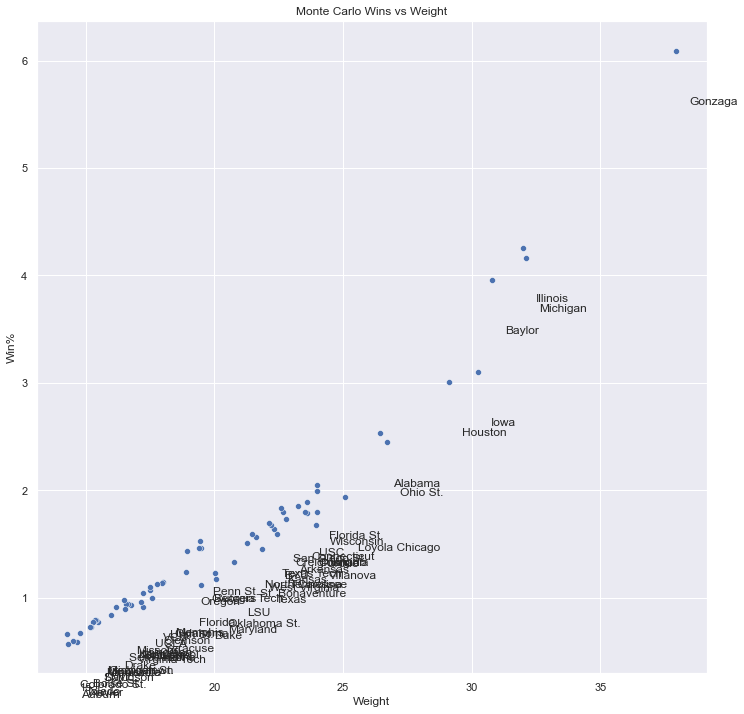

In [70]:
# Plotting
sns.scatterplot(data = m, x='Weight', y = 'Win%')
ax = plt.gca()
ax.set_title("Monte Carlo Wins vs Weight")
for index, row in m.iterrows():
    plt.text(row['Weight']+0.5, row['Win%']-0.5, row['Name'])

<AxesSubplot:xlabel='Win%', ylabel='Name'>

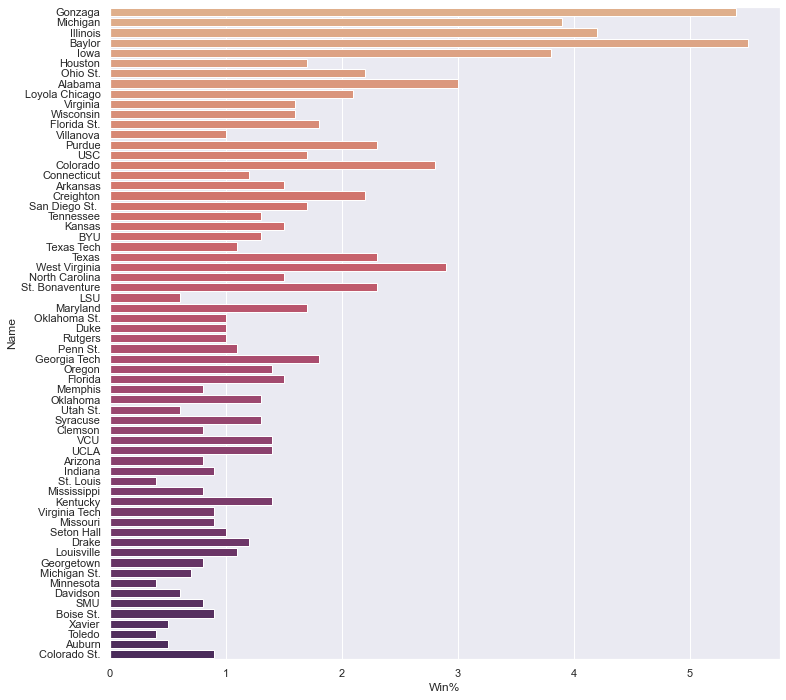

In [55]:
sns.barplot(data = m, x = 'Win%', y = 'Name', orient = 'h', palette = 'flare')

In [66]:
print(tmn)

============= [ROUND OF 32] =============
G01: Gonzaga (37.94)    	vs	Iowa (30.24)            	WINNER: Gonzaga (37.94)
G02: Loyola Chicago (25.08)	vs	Villanova (23.96)       	WINNER: Loyola Chicago (25.08)
G03: Connecticut (23.25)	vs	Tennessee (22.44)       	WINNER: Connecticut (23.25)
G04: Texas (21.87)      	vs	LSU (20.78)             	WINNER: Texas (21.87)
G05: Rutgers (19.48)    	vs	Florida (18.91)         	WINNER: Florida (18.91)
G06: Syracuse (17.56)   	vs	Arizona (17.21)         	WINNER: Arizona (17.21)
G07: Kentucky (16.55)   	vs	Drake (15.98)           	WINNER: Drake (15.98)
G08: Minnesota (15.28)  	vs	Xavier (14.68)          	WINNER: Xavier (14.68)
G09: Michigan (32.12)   	vs	Houston (29.13)         	WINNER: Houston (29.13)
G10: Virginia (23.99)   	vs	Purdue (23.6)           	WINNER: Virginia (23.99)
G11: Arkansas (22.8)    	vs	Kansas (22.33)          	WINNER: Kansas (22.33)
G12: West Virginia (21.62)	vs	Maryland (20.05)        	WINNER: West Virginia (21.62)
G13: Penn St. (19